# The Health Company Diet

# Importing the Libraries

In [20]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

# Loading the dataset CSV file

In [21]:
df=pd.read_csv("C:\\Users\\yashs\\OneDrive\\Desktop\\Python\\New folder\\diet.csv.csv")

# Checking the top 5 records

In [22]:
df.head()

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


# Checking the shape and information of the dataframe

In [23]:
df.shape

(78, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        78 non-null     object 
 1   Diet          78 non-null     object 
 2   weight        78 non-null     int64  
 3   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


# Checking the summary of the dataframe

In [25]:
df.describe()

,weight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


# Checking for missing values

In [26]:
df.isnull().sum()

gender          0
Diet            0
weight          0
weight6weeks    0
dtype: int64

# Checking distinct values of Diet

In [27]:
df["Diet"].value_counts()

B    27
C    27
A    24
Name: Diet, dtype: int64

# Creating box plots

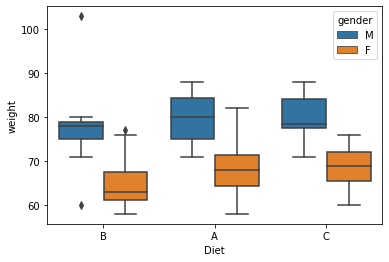

In [28]:
sns.boxplot(x="Diet",y="weight",data=df,hue="gender")

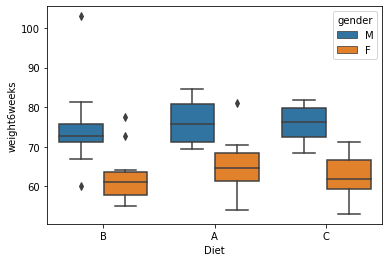

In [29]:
sns.boxplot(x="Diet",y="weight6weeks",data=df,hue="gender")

In [30]:
df["Weight_Gain"] = df["weight6weeks"]-df["weight"]

# Formulate the hypothesis of the One-way ANOVA of 'gender' variable with the 'weight6weeks' variable.

$H_0$ : The means of 'weight6weeks' variable with respect to each gender is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each gender is unequal.

In [31]:
df["gender"].value_counts()

F    43
M    35
Name: gender, dtype: int64

# One-way ANOVA with the 'gender' variable.

In [32]:
formula = "Weight_Gain~C(gender)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df      sum_sq   mean_sq         F    PR(>F)
C(gender)   1.0    0.222185  0.222185  0.033701  0.854833
Residual   76.0  501.050764  6.592773       NaN       NaN


#### Reject the null hypothesis, this means at least one of the means of 'weight6weeks' variable with respect to each gender is unequal

# Formulate the hypothesis of the One-way ANOVA of 'Diet' variable with the 'weight6weeks' variable.

$H_0$ : The means of 'weight6weeks' variable with respect to each diet category is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each diet category is unequal.

# One-way ANOVA with the 'Diet' variable.

In [35]:
formula = "Weight_Gain~C(Diet)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df      sum_sq    mean_sq         F    PR(>F)
C(Diet)    2.0   71.093689  35.546845  6.197447  0.003229
Residual  75.0  430.179259   5.735723       NaN       NaN


#### Since p value is greater than 0.05, we fail to reject the null hypothesis. This means that Diet variable alone doesn't have an impact on the means of the weight after 6 weeks

# Formulate the hypothesis of ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.

$H_0$ : The means of 'weight6weeks' variable with respect to each diet category and gender is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each diet category and gender is unequal.

# ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.

In [36]:
formula = "Weight_Gain~C(Diet)+C(gender)+C(Diet):C(gender)"
model = ols(formula,df).fit()
aov_table = anova_lm(model)
print(aov_table)

                     df      sum_sq    mean_sq         F    PR(>F)
C(Diet)             2.0   71.093689  35.546845  6.320953  0.002957
C(gender)           1.0    0.135526   0.135526  0.024099  0.877067
C(Diet):C(gender)   2.0   25.140704  12.570352  2.235264  0.114336
Residual           72.0  404.903029   5.623653       NaN       NaN


# Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables. 

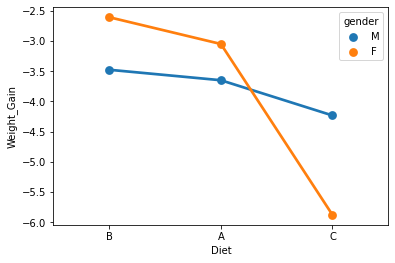

In [37]:
sns.pointplot(x="Diet",y="Weight_Gain",data=df,hue="gender",ci=None)

In [20]:
df[(df["Diet"]=="B") & (df["gender"]=="M")]["weight6weeks"].mean() - df[(df["Diet"]=="B") & (df["gender"]=="F")]["weight6weeks"].mean()

12.267582417582425

In [21]:
df[(df["Diet"]=="A") & (df["gender"]=="M")]["weight6weeks"].mean() - df[(df["Diet"]=="A") & (df["gender"]=="F")]["weight6weeks"].mean()

11.271428571428586

In [22]:
df[(df["Diet"]=="C") & (df["gender"]=="M")]["weight6weeks"].mean() - df[(df["Diet"]=="C") & (df["gender"]=="F")]["weight6weeks"].mean()

13.11333333333333